** The CNN network for happiness recognition**

We implement the recognition of emotion, which will be used for labeling videos.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


# GPU
gpu_device = 0
torch.cuda.set_device(gpu_device)
print('Chosen GPU device: ' + str(torch.cuda.current_device()))

Chosen GPU device: 0


In [110]:
from make_dataloader import *
import pickle
load = False
batch_size = 75
try:
    if load:
        loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))
    else:
        make_dataloader(only_two = True, batch_size = batch_size)
        loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))
except (OSError, IOError) as e:
    make_dataloader(only_two = True, batch_size = batch_size)
    loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))

   emotion                                             pixels     Usage
0        0  [70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....  Training
1        0  [151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...  Training
2        2  [231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...  Training
3        4  [24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....  Training
4        6  [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  Training
[array([  70.,   80.,   82., ...,  106.,  109.,   82.])
 array([ 151.,  150.,  147., ...,  193.,  183.,  184.])
 array([ 231.,  212.,  156., ...,   88.,  110.,  152.]) ...,
 array([  74.,   81.,   87., ...,  188.,  187.,  187.])
 array([ 222.,  227.,  203., ...,  136.,  136.,  134.])
 array([ 195.,  199.,  205., ...,    6.,   15.,   38.])]
Data preprocessed and loaders saved in :
./fer2013/fer2013Loaders.p


In [111]:
train_loader = loaders['train_loader']
valid_loader = loaders['valid_loader']
test_loader = loaders['test_loader']

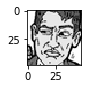

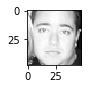

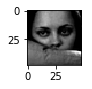

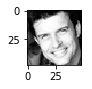

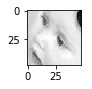

In [112]:
a = 0
for img,j in train_loader:
    plt.figure(figsize = (10,1))
    plt.imshow(img[0].numpy()[0], cmap="Greys_r")
    plt.show()
    a+=1
    if a >4:
        break

In [163]:
from emoCNN import *
import emoSolver
model = emoCNNnet(kernels = [12,6])
solver = emoSolver.emoSolver(optim_args={"lr": 0.01})

Chosen GPU device: 0
../youtube/video/2aU4wRgl_0E/time_stamps.csv
     0
0   32
1   38
2   74
3  114
4  140
   emotion                                             pixels     Usage
0        0  [224.0, 224.0, 224.0, 225.0, 224.0, 224.0, 224...  Training
1        0  [172.0, 169.0, 168.0, 163.0, 163.0, 163.0, 161...  Training
2        0  [254.0, 191.0, 149.0, 177.0, 251.0, 249.0, 253...  Training
3        0  [226.0, 236.0, 182.0, 128.0, 115.0, 119.0, 117...  Training
4        0  [240.0, 231.0, 230.0, 226.0, 227.0, 223.0, 217...  Training
[array([ 224.,  224.,  224., ...,   10.,   12.,   15.])
 array([ 172.,  169.,  168., ...,   96.,   97.,  103.])
 array([ 254.,  191.,  149., ...,    7.,    4.,    6.])
 array([ 226.,  236.,  182., ...,  213.,  217.,  228.])
 array([ 240.,  231.,  230., ...,  247.,  255.,  254.])
 array([  24.,   25.,   26., ...,  147.,  144.,  149.])
 array([ 225.,  228.,  227., ...,   16.,   15.,   26.])
 array([ 153.,  152.,  152., ...,    6.,    7.,    6.])]
Data prepro

/usr/local/lib/python3.5/dist-packages/torch/serialization.py:284: SourceChangeWarning: source code of class 'emoCNN.emoCNNnet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


[['../youtube/video/2aU4wRgl_0E/testcsv.csv', '[{"faceAttributes": {"smile": -0.3144707977771759}}]', 32], ['../youtube/video/2aU4wRgl_0E/testcsv.csv', '[{"faceAttributes": {"smile": -2.286545991897583}}]', 38], ['../youtube/video/2aU4wRgl_0E/testcsv.csv', '[{"faceAttributes": {"smile": -1.160949945449829}}]', 74], ['../youtube/video/2aU4wRgl_0E/testcsv.csv', '[{"faceAttributes": {"smile": 0.2665726840496063}}]', 114], ['../youtube/video/2aU4wRgl_0E/testcsv.csv', '[{"faceAttributes": {"smile": -1.0213702917099}}]', 140], ['../youtube/video/2aU4wRgl_0E/testcsv.csv', '[{"faceAttributes": {"smile": -3.379518747329712}}]', 115], ['../youtube/video/2aU4wRgl_0E/testcsv.csv', '[{"faceAttributes": {"smile": -0.6607691645622253}}]', 31], ['../youtube/video/2aU4wRgl_0E/testcsv.csv', '[{"faceAttributes": {"smile": -0.7272246479988098}}]', 158]]
<bound method Module.parameters of emoCNNnet (
  (feature): Sequential (
    (0): Conv2d(1, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1)

In [9]:
from graphviz import Digraph
import re
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd import Variable
#import torchvision.models as models


def make_dot(var, params=None):
    """ Produces Graphviz representation of PyTorch autograd graph
    Blue nodes are the Variables that require grad, orange are Tensors
    saved for backward in torch.autograd.Function
    Args:
        var: output Variable
        params: dict of (name, Variable) to add names to node that
            require grad (TODO: make optional)
    """
    if params is not None:
        assert isinstance(params.values()[0], Variable)
        param_map = {id(v): k for k, v in params.items()}

    node_attr = dict(style='filled',
                     shape='box',
                     align='left',
                     fontsize='12',
                     ranksep='0.1',
                     height='0.2')
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()

    def size_to_str(size):
        return '('+(', ').join(['%d' % v for v in size])+')'

    def add_nodes(var):
        if var not in seen:
            if torch.is_tensor(var):
                dot.node(str(id(var)), size_to_str(var.size()), fillcolor='orange')
            elif hasattr(var, 'variable'):
                u = var.variable
                name = param_map[id(u)] if params is not None else ''
                node_name = '%s\n %s' % (name, size_to_str(u.size()))
                dot.node(str(id(var)), node_name, fillcolor='lightblue')
            else:
                dot.node(str(id(var)), str(type(var).__name__))
            seen.add(var)
            if hasattr(var, 'next_functions'):
                for u in var.next_functions:
                    if u[0] is not None:
                        dot.edge(str(id(u[0])), str(id(var)))
                        add_nodes(u[0])
            if hasattr(var, 'saved_tensors'):
                for t in var.saved_tensors:
                    dot.edge(str(id(t)), str(id(var)))
                    add_nodes(t)
    add_nodes(var.grad_fn)
    return dot


In [11]:
y = Variable(torch.randn(1,1,48,48)).cuda(0)
g = make_dot(y)
g.view()

AttributeError: grad_fn

<class 'torch.FloatTensor'>
[[ 254.  254.  254. ...,   16.    0.  161.]
 [ 254.  254.  254. ...,   17.    0.  122.]
 [ 254.  254.  254. ...,   26.    0.  114.]
 ..., 
 [  66.   86.   99. ...,  255.  252.  254.]
 [  84.   92.   92. ...,  236.  255.  255.]
 [  93.   90.   85. ...,   42.  129.  180.]] (48, 48) <class 'numpy.ndarray'>


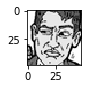

Variable containing:
-1.1915
 1.3183
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[ 156.  184.  198. ...,  157.  154.  150.]
 [ 146.  182.  199. ...,  161.  154.  150.]
 [ 135.  176.  195. ...,  165.  161.  155.]
 ..., 
 [  28.   25.   21. ...,  179.  175.  173.]
 [  29.   18.   22. ...,  177.  172.  169.]
 [  21.   14.   23. ...,  172.  167.  161.]] (48, 48) <class 'numpy.ndarray'>


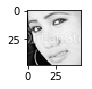

Variable containing:
-1.3278
 1.2839
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[  69.  118.   61. ...,  118.  124.  144.]
 [  66.  115.   57. ...,  129.  123.  131.]
 [  64.  116.   61. ...,  136.  140.  136.]
 ..., 
 [ 114.   87.  136. ...,   98.   84.   86.]
 [ 114.   85.  140. ...,   89.   84.   88.]
 [ 114.   87.  145. ...,   88.   87.   90.]] (48, 48) <class 'numpy.ndarray'>


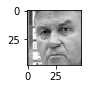

Variable containing:
-2.3320
 2.7226
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[ 205.  203.  236. ...,  127.  158.  144.]
 [ 186.  213.  140. ...,  156.  128.  171.]
 [ 197.   86.   36. ...,  177.  128.  172.]
 ..., 
 [  31.   69.  113. ...,   37.   60.   74.]
 [  29.   58.  122. ...,   38.   72.   93.]
 [  40.   35.  113. ...,   43.   82.   86.]] (48, 48) <class 'numpy.ndarray'>


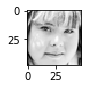

Variable containing:
-0.8406
 0.9074
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[  87.   79.   74. ...,   92.   94.  112.]
 [  98.   73.   68. ...,  118.  133.  143.]
 [  88.   69.   63. ...,  117.  123.  121.]
 ..., 
 [  44.   36.   62. ...,   46.   42.   38.]
 [  46.   45.   52. ...,   42.   35.   32.]
 [  48.   51.   46. ...,   41.   34.   32.]] (48, 48) <class 'numpy.ndarray'>


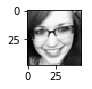

Variable containing:
 1.1548
-0.9395
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[ 235.  233.  223. ...,   24.   28.   37.]
 [ 231.  233.  220. ...,   24.   33.   30.]
 [ 229.  236.  157. ...,   35.   33.   30.]
 ..., 
 [ 239.  134.  139. ...,   24.   31.   28.]
 [ 242.  205.  108. ...,   31.   20.   24.]
 [ 234.  242.  126. ...,   33.   17.   19.]] (48, 48) <class 'numpy.ndarray'>


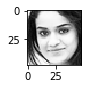

Variable containing:
 1.0429
-1.1002
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[  71.   70.  104. ...,  108.  118.  116.]
 [  45.   80.   83. ...,   99.  105.  117.]
 [  98.  160.  102. ...,   93.   83.   99.]
 ..., 
 [ 179.  184.  200. ...,  110.  111.  113.]
 [ 178.  187.  202. ...,  116.  112.  111.]
 [ 181.  193.  199. ...,  127.  105.  108.]] (48, 48) <class 'numpy.ndarray'>


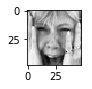

Variable containing:
-1.3146
 1.7366
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[ 176.  177.  170. ...,   94.   87.  108.]
 [ 181.  180.  180. ...,   98.   89.   97.]
 [ 178.  182.  187. ...,   95.   95.   87.]
 ..., 
 [ 135.  140.  146. ...,  148.  152.  156.]
 [ 144.  139.  155. ...,  152.  160.  162.]
 [ 152.  141.  149. ...,  130.  144.  141.]] (48, 48) <class 'numpy.ndarray'>


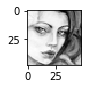

Variable containing:
-0.8260
 0.8973
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[ 255.  255.  255. ...,  255.  255.  255.]
 [ 218.  217.  217. ...,  217.  217.  217.]
 [ 179.  175.  173. ...,  185.  185.  184.]
 ..., 
 [  98.   98.   96. ...,  148.  126.  133.]
 [ 211.  210.  210. ...,  214.  213.  213.]
 [ 255.  255.  255. ...,  255.  255.  255.]] (48, 48) <class 'numpy.ndarray'>


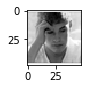

Variable containing:
-2.0199
 1.9338
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[ 126.  126.  123. ...,   64.   61.   52.]
 [ 130.  128.  125. ...,   62.   66.   55.]
 [ 130.  128.  126. ...,   60.   56.   55.]
 ..., 
 [ 205.  198.  207. ...,   18.   13.   30.]
 [ 201.  196.  222. ...,   33.   13.   26.]
 [ 191.  206.  237. ...,  130.   97.   78.]] (48, 48) <class 'numpy.ndarray'>


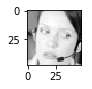

Variable containing:
-1.4038
 1.3224
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[ 180.  175.  169. ...,  222.  224.  228.]
 [ 175.  169.  163. ...,  219.  222.  228.]
 [ 170.  163.  153. ...,  217.  222.  228.]
 ..., 
 [ 166.  166.  169. ...,  127.  124.  120.]
 [ 166.  166.  170. ...,   43.   42.   41.]
 [ 167.  166.  167. ...,   32.   32.   33.]] (48, 48) <class 'numpy.ndarray'>


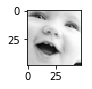

Variable containing:
1.00000e-02 *
  7.1862
 -1.2282
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[  88.   46.   35. ...,  182.  180.  214.]
 [  68.   34.   31. ...,  195.  183.  208.]
 [  51.   34.   35. ...,  184.  166.  196.]
 ..., 
 [ 106.   94.   70. ...,  228.  227.  227.]
 [  99.   89.   61. ...,  226.  227.  228.]
 [  88.   78.   54. ...,  229.  228.  227.]] (48, 48) <class 'numpy.ndarray'>


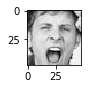

Variable containing:
-3.0994
 3.2480
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[ 121.  112.   64. ...,   25.   89.   80.]
 [ 143.  109.   76. ...,   10.   46.  114.]
 [ 146.  104.  103. ...,   15.   14.   63.]
 ..., 
 [ 151.   54.   35. ...,   63.   76.   91.]
 [ 204.  139.   92. ...,   72.   86.   85.]
 [ 191.  202.  142. ...,   81.   83.   85.]] (48, 48) <class 'numpy.ndarray'>


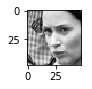

Variable containing:
-1.3122
 1.5088
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[ 165.  203.  211. ...,  163.  174.  175.]
 [ 167.  207.  205. ...,  159.  164.  165.]
 [ 177.  209.  198. ...,  158.  153.  161.]
 ..., 
 [ 153.  133.  139. ...,  194.  204.  182.]
 [ 216.  143.  138. ...,  198.  197.  183.]
 [ 248.  183.  137. ...,  189.  178.  167.]] (48, 48) <class 'numpy.ndarray'>


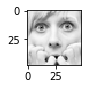

Variable containing:
-1.7050
 1.6984
[torch.cuda.FloatTensor of size 2 (GPU 0)]

[[  22.   28.   27. ...,   18.   20.   18.]
 [  25.   29.   27. ...,   19.   18.   17.]
 [  29.   29.   26. ...,   19.   19.   20.]
 ..., 
 [ 129.  129.  119. ...,   90.  107.  145.]
 [ 129.  133.  113. ...,   93.   85.  117.]
 [ 129.  131.  113. ...,   90.   81.   92.]] (48, 48) <class 'numpy.ndarray'>


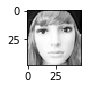

Variable containing:
-1.7572
 1.6303
[torch.cuda.FloatTensor of size 2 (GPU 0)]



In [100]:
a = 0
import scipy.misc
for img,j in train_loader:
    result = model(Variable(img).cuda(0))
    print(type(img))
    for i in range(0,15):
        plt.figure(figsize = (10,1))
        plt.imshow(img[i].numpy()[0], cmap="Greys_r")
        a = img[i].numpy()[0]
        SE = a
        print(a,a.shape, type(a))
        scipy.misc.imsave("test"+str(i)+".jpg",a)        
        plt.show()    
        print(result[i])
    break

In [164]:
solver.train(model, train_loader, valid_loader, log_nth=100, num_epochs=20)

START TRAIN.
[iteration 0/940] TRAIN loss : 0.640588
[iteration 0/940] VALID acc/loss : 0.672000/0.599549
[Epoch 0/20] TRAIN acc/loss : 0.800000/0.483198
[Epoch 0/20] VALID acc/loss : 0.797333/0.478821
[Epoch 1/20] TRAIN acc/loss : 0.813333/0.437019
[Epoch 1/20] VALID acc/loss : 0.824000/0.412245
[iteration 100/940] TRAIN loss : 0.349541
[iteration 100/940] VALID acc/loss : 0.856000/0.338727
[Epoch 2/20] TRAIN acc/loss : 0.840000/0.379800
[Epoch 2/20] VALID acc/loss : 0.853333/0.360649
[Epoch 3/20] TRAIN acc/loss : 0.893333/0.311728
[Epoch 3/20] VALID acc/loss : 0.869333/0.301462
[iteration 200/940] TRAIN loss : 0.399118
[iteration 200/940] VALID acc/loss : 0.925333/0.215478
[Epoch 4/20] TRAIN acc/loss : 0.840000/0.273643
[Epoch 4/20] VALID acc/loss : 0.858667/0.294701
[Epoch 5/20] TRAIN acc/loss : 0.933333/0.199602
[Epoch 5/20] VALID acc/loss : 0.909333/0.218242
[iteration 300/940] TRAIN loss : 0.095786
[iteration 300/940] VALID acc/loss : 0.965333/0.124650
[Epoch 6/20] TRAIN acc/loss

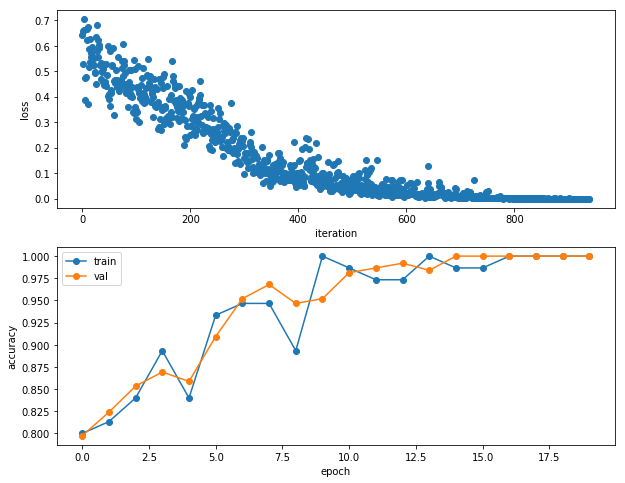

In [165]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [166]:
import pickle
torch.save(model.state_dict(),'./emoCNNtrivialdic')

In [10]:
m = torch.load(open('./emoCNNtrivialdic','rb'))
m2 = emoCNNnet(kernels = [12,6])
m2.load_state_dict(torch.load('./emoCNNtrivialdic'))
m2

<bound method Module.parameters of emoCNNnet (
  (feature): Sequential (
    (0): Conv2d(1, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Conv2d(12, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (4): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU ()
  )
  (classifier): Sequential (
    (0): Linear (27648 -> 100)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Linear (100 -> 2)
  )
)>


emoCNNnet (
  (feature): Sequential (
    (0): Conv2d(1, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Conv2d(12, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (4): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU ()
  )
  (classifier): Sequential (
    (0): Linear (27648 -> 100)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Linear (100 -> 2)
  )
)

In [139]:
import scipy.misc
import csv
f = open("testcsv.csv", 'w')
f.write('emotion,pixels,Usage\n')
for i in range(15):
    a = 'test'+str(i)+'.jpg'
    img_array = scipy.misc.imread(a)
   
    s = img_array.reshape(1,-1)[0]
    s = ["%.2f" % number for number in s]
    ss=""
    for ii in s:
        ss+=' '+ii
    #s=s[2:-2]
    s=ss
    a=int(0)
    f.write(str(a)+','+s+",Training\n")
f.close()

In [143]:
make_dataloader(only_two = True, batch_size = 5,file_name='testcsv.csv',predict=True)
loaders = pickle.load(open("testcsv.p","rb"))

   emotion                                             pixels     Usage
0        1  [249.0, 255.0, 254.0, 252.0, 255.0, 239.0, 255...  Training
1        1  [160.0, 187.0, 200.0, 210.0, 205.0, 221.0, 209...  Training
2        1  [72.0, 128.0, 61.0, 64.0, 100.0, 133.0, 102.0,...  Training
3        1  [223.0, 215.0, 255.0, 168.0, 72.0, 168.0, 116....  Training
4        1  [85.0, 77.0, 66.0, 64.0, 75.0, 85.0, 81.0, 71....  Training
[array([ 249.,  255.,  254., ...,   50.,  138.,  173.])
 array([ 160.,  187.,  200., ...,  176.,  171.,  168.])
 array([  72.,  128.,   61., ...,   89.,   89.,   94.])
 array([ 223.,  215.,  255., ...,   24.,   78.,   85.])
 array([ 85.,  77.,  66., ...,  32.,  24.,  18.])
 array([ 255.,  233.,  240., ...,   33.,   23.,   18.])
 array([  75.,   80.,  111., ...,  137.,  125.,  122.])
 array([ 221.,  217.,  211., ...,  157.,  173.,  176.])
 array([ 254.,  255.,  255., ...,  255.,  252.,  255.])
 array([ 132.,  127.,  122., ...,  125.,   96.,   75.])
 array([ 187.,

In [161]:
d_train = loaders['train_loader']
i=0
for im, jj in d_train:
    model_res = model(Variable(im,requires_grad=False).cuda(0)).cpu()
    print(model_res)
    i+=1


Variable containing:
-1.4649  1.4870
-1.8403  1.6321
-2.3610  2.8339
-0.7778  0.7383
 0.6222 -0.5520
[torch.FloatTensor of size 5x2]

Variable containing:
 0.3771 -0.4066
-1.8166  2.3413
-0.7923  0.8055
-1.9730  1.7776
-1.6728  1.5529
[torch.FloatTensor of size 5x2]

Variable containing:
 0.0275  0.0002
-2.1731  2.3809
-1.0193  1.1856
-1.2626  1.2830
-1.2552  1.0773
[torch.FloatTensor of size 5x2]



<class 'numpy.ndarray'>

(0 ,0 ,.,.) = 
  2.4900e+02  2.5500e+02  2.5400e+02  ...   1.1000e+01  1.3000e+01  1.5800e+02
  2.5200e+02  2.5500e+02  2.5500e+02  ...   1.7000e+01  1.0000e-04  1.2500e+02
  2.5500e+02  2.5500e+02  2.5500e+02  ...   3.3000e+01  1.0000e-04  1.0600e+02
                 ...                   ⋱                   ...                
  7.9000e+01  9.2000e+01  1.0100e+02  ...   2.4600e+02  2.3800e+02  2.5200e+02
  7.8000e+01  8.3000e+01  8.2000e+01  ...   2.3300e+02  2.5500e+02  2.5500e+02
  9.1000e+01  9.7000e+01  8.5000e+01  ...   5.0000e+01  1.3800e+02  1.7300e+02
[torch.FloatTensor of size 1x1x48x48]



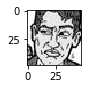

In [15]:
import modelInterface
import cv2
from PIL import Image
import scipy.misc
#a = ['../youtube/video/RwKzPEF6ssw/320face.jpg','../youtube/video/RwKzPEF6ssw/620face.jpg']
a = ['test0.jpg','test1.jpg']
#img_array = cv2.imread(a[1],0)
img_array = scipy.misc.imread(a[0])
#img_array = list(img_array.getdata())
#img_array = np.array(img_array)
img_array = img_array.reshape((48,48))
im = img_array.astype(np.float64)+0.0001
print(type(im))
#for i in im:
#    print(i)
TT = torch.from_numpy(im).unsqueeze(0).unsqueeze(0).float()
model_res = model(Variable(TT,requires_grad=False).cuda(0)).cpu()
plt.figure(figsize = (10,1))
plt.imshow(img_array, cmap="Greys_r")
plt.show()
#modelInterface.processImagesBatch(a,model = model)

In [16]:
TT
model_res
#SE

Variable containing:
-0.1275  0.1455
[torch.FloatTensor of size 1x2]